In [1]:
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\Billionaires_dataset.csv')

In [5]:
df.shape

(2591, 30)

In [6]:
df.head()

,position,wealth,industry,full_name,age,country_of_residence,city_of_residence,source,citizenship,gender,...,gdp_country,g_tertiary_ed_enroll,g_primary_ed_enroll,life_expectancy,tax_revenue,tax_rate,country_pop,country_lat,country_long,continent
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,France,M,...,2715518274227,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,Europe
1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America


In [10]:
df=df[['position', 'wealth', 'industry', 'full_name', 'age',
       'country_of_residence','source','gender','tax_revenue','continent']]

In [11]:
df

,position,wealth,industry,full_name,age,country_of_residence,source,gender,tax_revenue,continent
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,LVMH,M,24.2,Europe
1,2,180000,Automotive,Elon Musk,51,United States,"Tesla, SpaceX",M,9.6,North America
2,3,114000,Technology,Jeff Bezos,59,United States,Amazon,M,9.6,North America
3,4,107000,Technology,Larry Ellison,78,United States,Oracle,M,9.6,North America
4,5,106000,Finance & Investments,Warren Buffett,92,United States,Berkshire Hathaway,M,9.6,North America
...,...,...,...,...,...,...,...,...,...,...
2586,2540,1000,Healthcare,Yu Rong,51,China,Health clinics,M,9.4,Asia
2587,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80,United States,Beer,M,9.6,North America
2588,2540,1000,Manufacturing,Zhang Gongyun,60,China,Tyre manufacturing machinery,M,9.4,Asia
2589,2540,1000,Real Estate,Zhang Guiping & family,71,China,Real estate,M,9.4,Asia


# task 1: which five counrties have the most wealth regards to there billionairs

In [26]:
c=df.groupby('country_of_residence',as_index=False)
.sum('wealth').sort_values(by='wealth',ascending=False)
.reset_index(drop=True).iloc[0:5,0:3]

In [34]:
c.drop(columns={'position'},inplace=True)
c.rename(columns={'country_of_residence':'Country','wealth':'Total_Wealth'},inplace=True)

In [35]:
c

,Country,Total_Wealth
0,United States,4575100
1,China,1790000
2,India,628700
3,France,499500
4,Germany,462100


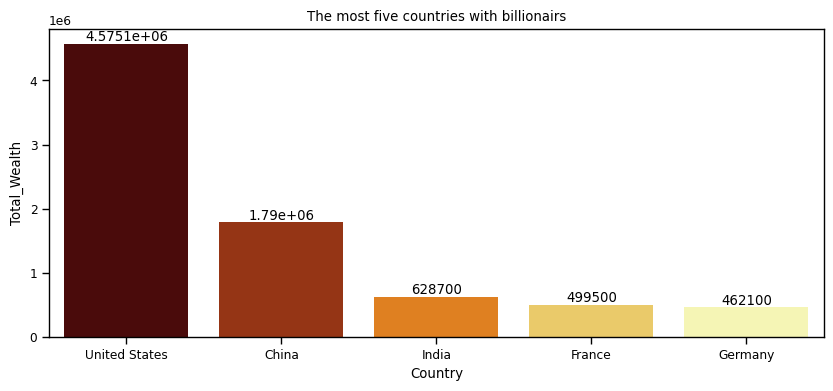

In [93]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.set_context('paper',font_scale=1)
sns.barplot(data=c,x='Country',y='Total_Wealth',palette='afmhot')
sns.despine(top=False,
    right=False)
plt.title('The most five countries with billionairs')
ax.bar_label(ax.containers[0])
plt.show()

In [71]:
df1=df.iloc[0:20,:].copy()

# task 2: finding out if there a correlation between  age and wealth


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 200x200 with 0 Axes>

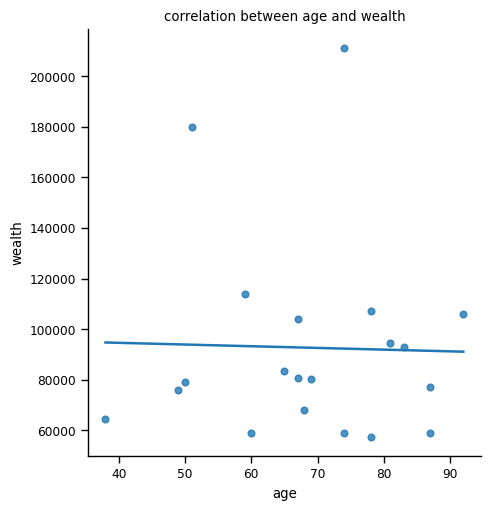

In [150]:
plt.figure(figsize=(2,2))
sns.lmplot(df1,x='age',y='wealth',ci=False,palette='afmhot')
plt.title('correlation between age and wealth')
plt.show()

I do not there is correlation between the age and the wealth

# task 3: what is the most popular age for billionairs

C:\Users\HP\AppData\Local\Temp\ipykernel_18464\3317550067.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['age'],bins=15,kde=False,color='#ff4d00')


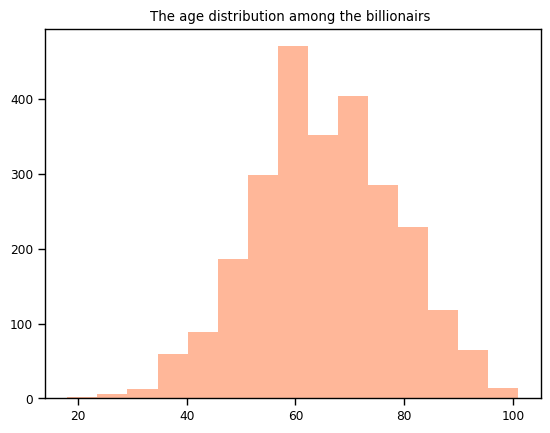

In [149]:
sns.distplot(x=df['age'],bins=15,kde=False,color='#ff4d00')
plt.title('The age distribution among the billionairs ')
plt.show()

I think the most popular age is around (50 - 70)

# task 4: what is the most five industries with billionairs

In [109]:
d=df.groupby('industry',as_index=False).count().sort_values(by='position',ascending=False).iloc[0:5,0:2]

In [113]:
d.rename(columns={'position':'count_of_idustries'},inplace=True)

In [115]:
d

,industry,count_of_idustries
5,Finance & Investments,364
10,Manufacturing,316
16,Technology,312
4,Fashion & Retail,261
6,Food & Beverage,207


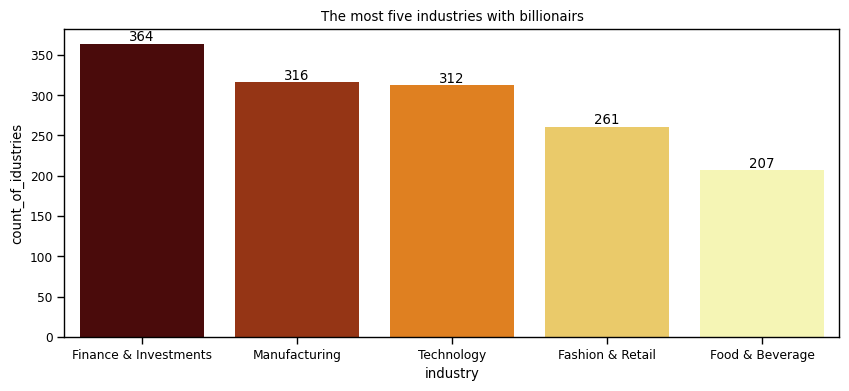

In [116]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.set_context('paper',font_scale=1)
sns.barplot(data=d,x='industry',y='count_of_idustries',palette='afmhot')
sns.despine(top=False,
    right=False)
plt.title('The most five industries with billionairs')
ax.bar_label(ax.containers[0])
plt.show()

# task 5:display the difference between male vs feamle 

In [119]:
v=df.groupby('gender',as_index=False).count().sort_values(by='position',ascending=False).iloc[0:5,0:2]

In [121]:
v.rename(columns={'position':'count_of_people'},inplace=True)

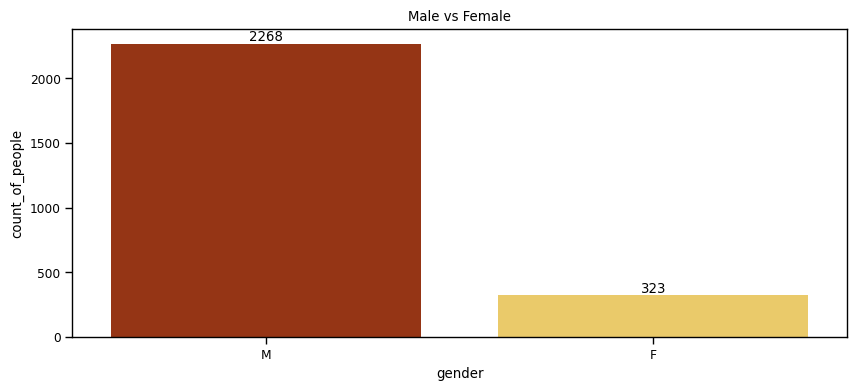

In [140]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.set_context('paper',font_scale=1)
sns.barplot(data=v,x='gender',y='count_of_people',palette='afmhot')
sns.despine(top=False,
    right=False)
plt.title('Male vs Female')
ax.bar_label(ax.containers[0])
plt.show()